In [4]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=a52c2ded96f3c7cc5342d794821ffbde91fdbb77a4304d56a706096303c27964
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [5]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

In [9]:
Xm, ym = make_moons(n_samples=100, noise = 0.25, random_state=3)
Xm_train, Xm_test , ym_train, ym_test = train_test_split(Xm, ym,stratify= ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target,random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators = 100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train,yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42, ver

In [11]:
print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("oob 샘플의 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도 : 0.958
테스트 세트 정확도 : 0.958
oob 샘플의 정확도 : 0.944


In [12]:
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train,ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


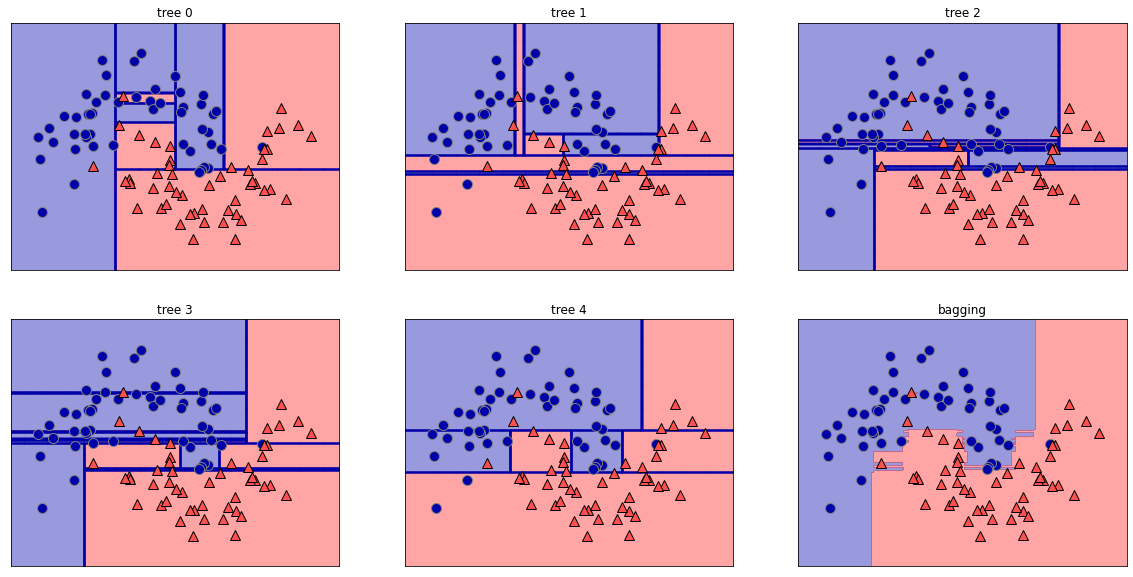

In [13]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax = axes[-1,-1], alpha = .4)
axes[-1,-1].set_title("bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)

In [14]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train,yc_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [15]:
print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("oob 샘플의 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
oob 샘플의 정확도 : 0.951


ExtraTreesClassifier

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
xtree= ExtraTreesClassifier(n_estimators = 5, n_jobs = -1, random_state =0)
xtree.fit(Xm_train,ym_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

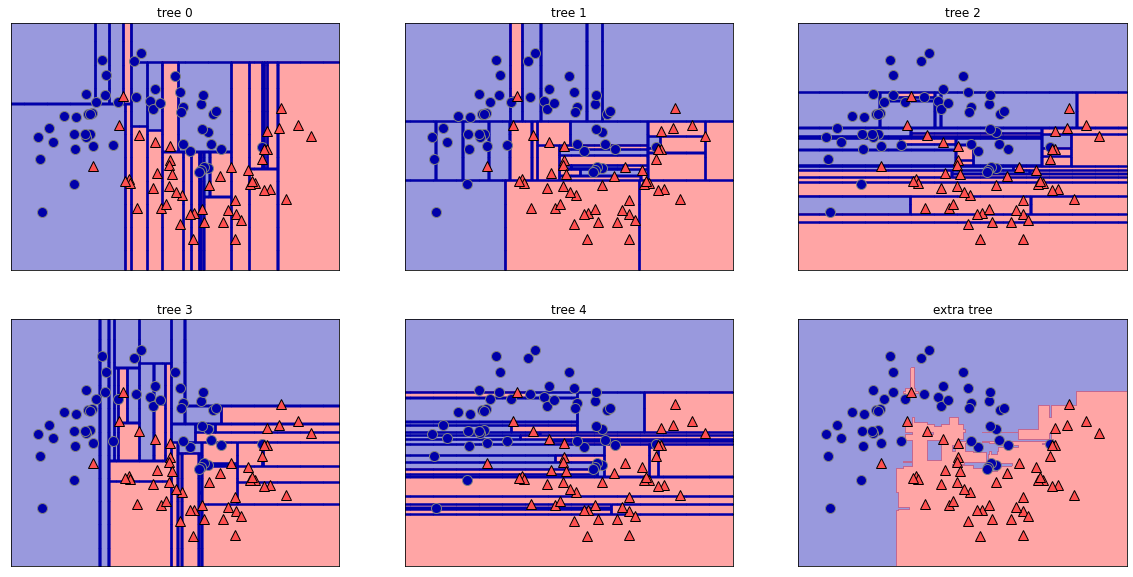

In [17]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax = axes[-1,-1], alpha = .4)
axes[-1,-1].set_title("extra tree")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
xtree= ExtraTreesClassifier(n_estimators = 100, n_jobs = -1, random_state =0)
xtree.fit(Xc_train,yc_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [19]:
print("훈련 세트 정확도 : {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


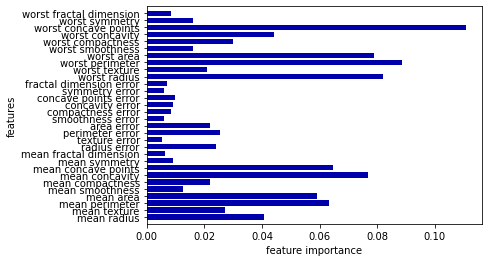

In [20]:
import numpy as np
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), xtree.feature_importances_,align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("feature importance")
plt.ylabel("features")
plt.ylim(-1,n_features)
plt.show()

# AdaBoostClassifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 5, random_state = 42)
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=42)

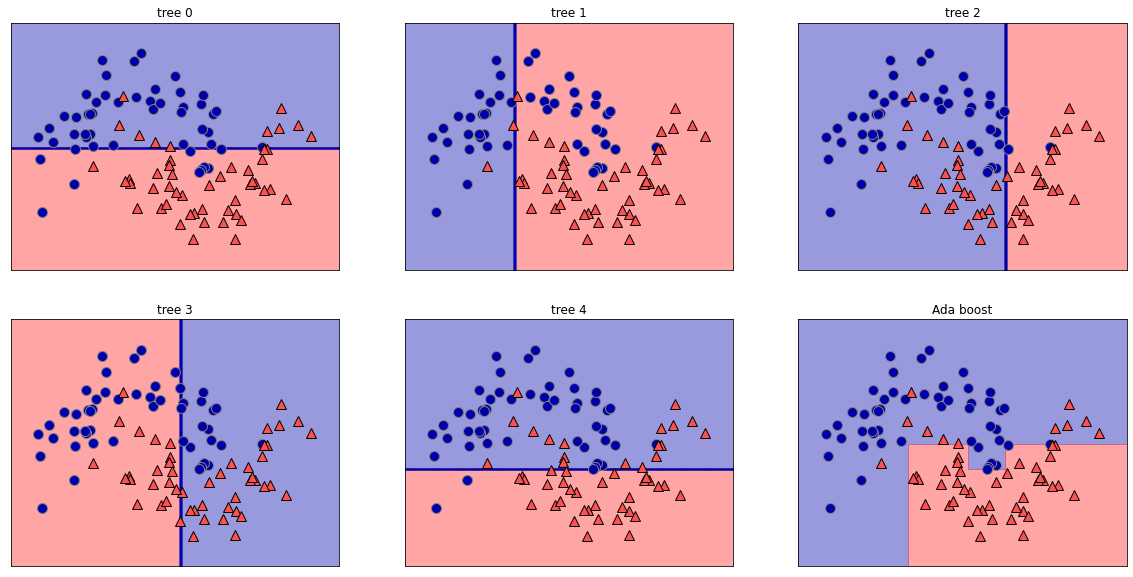

In [22]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax = axes[-1,-1], alpha = .4)
axes[-1,-1].set_title("Ada boost")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [24]:
ada = AdaBoostClassifier(n_estimators = 100, random_state = 42)
ada.fit(Xc_train, yc_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [25]:
print("훈련 세트 정확도 : {:.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986


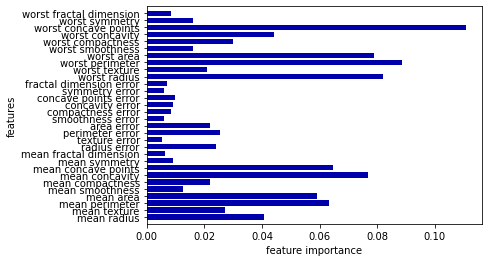

In [26]:
import numpy as np
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), xtree.feature_importances_,align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("feature importance")
plt.ylabel("features")
plt.ylim(-1,n_features)
plt.show()